# Assignment No. 01

# Title of the Assignment: Linear Regression using Deep Neural Network

## Objective:
- Implement linear regression using a Deep Neural Network (DNN).
- Solve the Boston Housing Price Prediction problem using the Boston Housing dataset.
- Understand the basics of neural networks and their advantage over traditional machine learning models like linear regression.


In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing


In [2]:
# Step 2: Load the Dataset from Keras
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (404, 13)
Test data shape: (102, 13)


In [3]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
x_test

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [7]:
x_train_scaled
x_test_scaled

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [8]:
# Step 4: Build the Deep Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (predicting a single value)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model

<Sequential name=sequential, built=True>

In [10]:
# Step 5: Train the Model
history = model.fit(x_train_scaled, y_train, epochs=15, batch_size=32,
                    validation_split=0.2, verbose=1)


Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 535.4647 - mae: 21.4383 - val_loss: 592.2673 - val_mae: 22.5423
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 515.3456 - mae: 20.8456 - val_loss: 541.4711 - val_mae: 21.4296
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 471.6953 - mae: 19.7995 - val_loss: 473.2844 - val_mae: 19.8390
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 358.1347 - mae: 16.8458 - val_loss: 385.5938 - val_mae: 17.6137
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 313.2638 - mae: 15.3923 - val_loss: 280.1523 - val_mae: 14.4751
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 216.9697 - mae: 12.2076 - val_loss: 184.2231 - val_mae: 10.8705
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 125.9203 - mae: 9.1977 - val_loss: 117.3883 - val_mae: 8.2248
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 80.9027 - mae: 6.8685 - val_loss: 86.8053 - val_mae: 7.2280
Epoch 9/15
11/11 ━━━━━

In [11]:
history

In [12]:
# Step 6: Evaluate the Model
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)
print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.3534 - mae: 4.2112

Test Mean Absolute Error (MAE): 4.35


In [13]:
print("\nTest Mean Squared Error: ",test_loss)


Test Mean Squared Error:  31.984085083007812


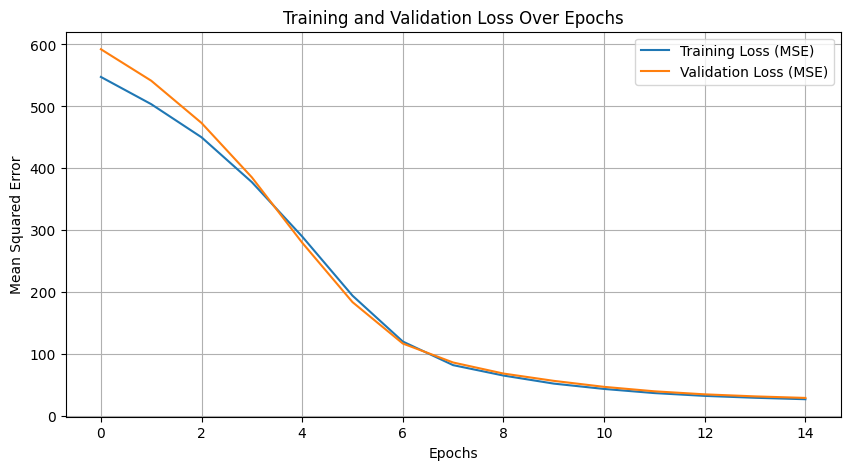

In [14]:
# Step 7: Visualize the Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


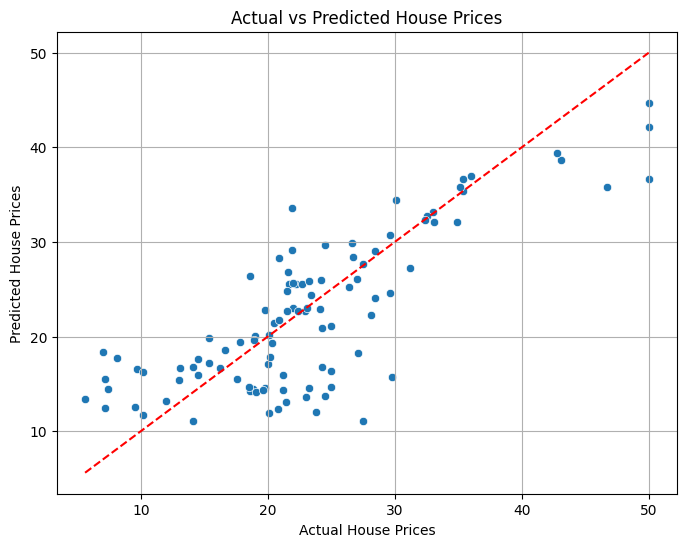

In [15]:
# Step 8: Predictions and Visualization
predictions = model.predict(x_test_scaled).flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

In [16]:
predictions

array([12.427872, 14.464466, 20.051949, 26.117865, 25.533073, 13.712288,
       27.206787, 22.681126, 21.45826 , 14.571318, 14.225168, 17.662334,
       19.42224 , 42.190792, 12.382889, 20.933714, 25.980839, 22.852343,
       14.117459, 25.551601, 13.137075, 11.676864, 17.052505, 14.673491,
       28.259884, 13.650888, 27.683756, 34.44687 , 12.529841, 22.97975 ,
       15.967428, 11.052101, 32.145935, 24.368488, 11.90126 , 14.405568,
       19.858917, 12.049048, 20.113476, 29.720346, 33.189228, 29.051577,
       16.809288, 35.812347, 32.78781 , 24.576736, 24.036835, 14.534505,
       17.84443 , 21.07109 , 35.398415, 19.301771, 16.517715, 15.919291,
       32.05742 , 29.882847, 15.487575, 44.63369 , 32.26632 , 26.799885,
       15.759494, 16.667107, 11.029303, 14.331076, 22.99092 , 29.101427,
       15.398392, 25.862709, 17.70134 , 13.344783, 25.57509 , 30.712158,
       14.358259, 18.338701, 25.182442, 19.608356, 21.7056  , 22.237003,
       36.632523, 16.225574, 16.780294, 38.616943, 